In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [53]:
class WebScraper():
    def __init__(self):
        self.soup = BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Global_Peace_Index").content, 'html.parser')
    def extract_data(self):
        table = self.soup.find('table', class_ = "wikitable sortable sortable style=")
        data = []
        for info in table.find_all_next('tr'):
            items = info.text.split("\n")
            items_filtered = list(filter(lambda item: item != "", items))
            if len(items_filtered) < 3:
                break
            items_filtered = items_filtered[1:3]
            items_filtered[0] = items_filtered[0].replace('\xa0', '')
            data.append(items_filtered)
        for items in data[1:]:
            items[1] = float(items[1])
        return data[0], data[1:]

In [54]:
scraper = WebScraper()

In [55]:
head, data = scraper.extract_data()

In [56]:
df = pd.DataFrame(data, columns=head)

In [57]:
df

,Country,Score
0,Iceland,1.124
1,Denmark,1.310
2,Ireland,1.312
3,New Zealand,1.313
4,Austria,1.316
...,...,...
158,Democratic Republic of the Congo,3.214
159,South Sudan,3.221
160,Syria,3.294
161,Yemen,3.350


<Axes: xlabel='Score', ylabel='Country'>

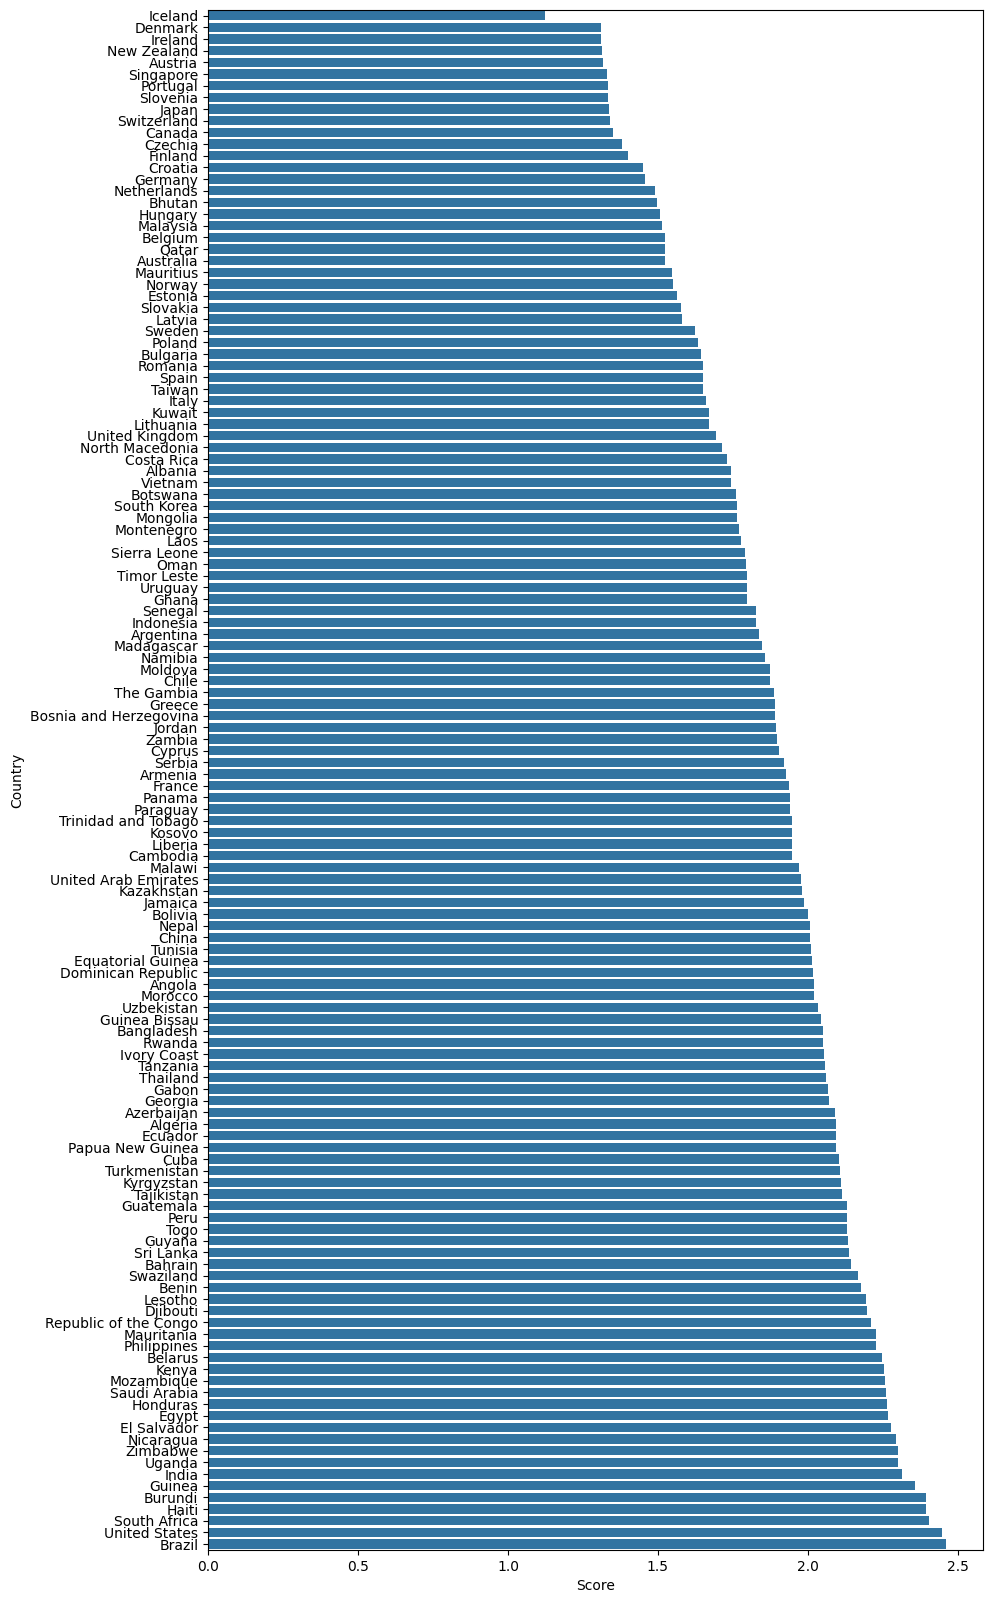

In [64]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(df[df["Score"] < 2.5], x="Score", y="Country")